# Problem Statement

It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable. 

# Libraries

In [186]:
from warnings import filterwarnings
filterwarnings ('ignore')


import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder,StandardScaler

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.linear_model import Lasso, Ridge

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score



# Data Gathering/Fetching

In [187]:
df=pd.read_csv("D:/Dataset/training_set.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# EDA

# Separating Categorical and Continous columns

In [188]:
cat=df.select_dtypes(include='object')
con=df.select_dtypes(exclude='object')

#Here we are first separating categorical & contionus columns as the dataset is large in number.

In [189]:
cat

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


# Finding Missing value in categorical columns

In [190]:
cat.isna().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

# Filling the missing values

In [191]:
for i in cat:
    if cat[i].dtypes=='object':
        cat[i]=cat[i].fillna(cat[i].mode()[0])
    else:
        cat[i]=cat[i].fillna(cat[i].median()[0])

In [192]:
cat.isna().sum()                                                  #Rechecking for the missing values.

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

# Finding missing values in con columns

In [193]:
con.isna().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

# Filling missing values in con columns

In [194]:
for i in con:
    if con[i].dtypes=='object':
        con[i]=con[i].fillna(con[i].mode()[0])
    else:
        con[i]=con[i].fillna(con[i].median())

In [195]:
con.isna().sum()                                                       #Rechecking for the missing values.

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

# Joining the columns

In [196]:
df1=con.join(cat)
df1

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,Detchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Abnorml
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,Attchd,RFn,TA,TA,Y,Gd,GdPrv,Shed,WD,Normal
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal


In [197]:
df1.corr()[['SalePrice']]                                 #Finding correlation of columns with respect to "SalePrice".

,SalePrice
Id,-0.021917
MSSubClass,-0.084284
LotFrontage,0.334771
LotArea,0.263843
OverallQual,0.790982
OverallCond,-0.077856
YearBuilt,0.522897
YearRemodAdd,0.507101
MasVnrArea,0.472614
BsmtFinSF1,0.386420


# Define x and y

In [198]:
x1=df1.drop(['SalePrice','Id','MSSubClass','OverallCond','BsmtFinSF2','LowQualFinSF','BsmtHalfBath','KitchenAbvGr','EnclosedPorch','MiscVal','YrSold'],axis=1)     

#Can create multicollinearity.
#Shows Low Correlation.
#Encoders require their input to be uniformly strings or numbers.

y1=df1[['SalePrice']]          
           
           

In [199]:
x1

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,65.0,8450,7,2003,2003,196.0,706,150,856,856,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1,80.0,9600,6,1976,1976,0.0,978,284,1262,1262,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
2,68.0,11250,7,2001,2002,162.0,486,434,920,920,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
3,60.0,9550,7,1915,1970,0.0,216,540,756,961,...,Detchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Abnorml
4,84.0,14260,8,2000,2000,350.0,655,490,1145,1145,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,6,1999,2000,0.0,0,953,953,953,...,Attchd,RFn,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1456,85.0,13175,6,1978,1988,119.0,790,589,1542,2073,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
1457,66.0,9042,7,1941,2006,0.0,275,877,1152,1188,...,Attchd,RFn,TA,TA,Y,Gd,GdPrv,Shed,WD,Normal
1458,68.0,9717,5,1950,1996,0.0,49,0,1078,1078,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal


In [200]:
y1

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [201]:
x1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 70 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1460 non-null   float64
 1   LotArea        1460 non-null   int64  
 2   OverallQual    1460 non-null   int64  
 3   YearBuilt      1460 non-null   int64  
 4   YearRemodAdd   1460 non-null   int64  
 5   MasVnrArea     1460 non-null   float64
 6   BsmtFinSF1     1460 non-null   int64  
 7   BsmtUnfSF      1460 non-null   int64  
 8   TotalBsmtSF    1460 non-null   int64  
 9   1stFlrSF       1460 non-null   int64  
 10  2ndFlrSF       1460 non-null   int64  
 11  GrLivArea      1460 non-null   int64  
 12  BsmtFullBath   1460 non-null   int64  
 13  FullBath       1460 non-null   int64  
 14  HalfBath       1460 non-null   int64  
 15  BedroomAbvGr   1460 non-null   int64  
 16  TotRmsAbvGrd   1460 non-null   int64  
 17  Fireplaces     1460 non-null   int64  
 18  GarageYr

# Data Visualization

<Axes: xlabel='MoSold', ylabel='SalePrice'>

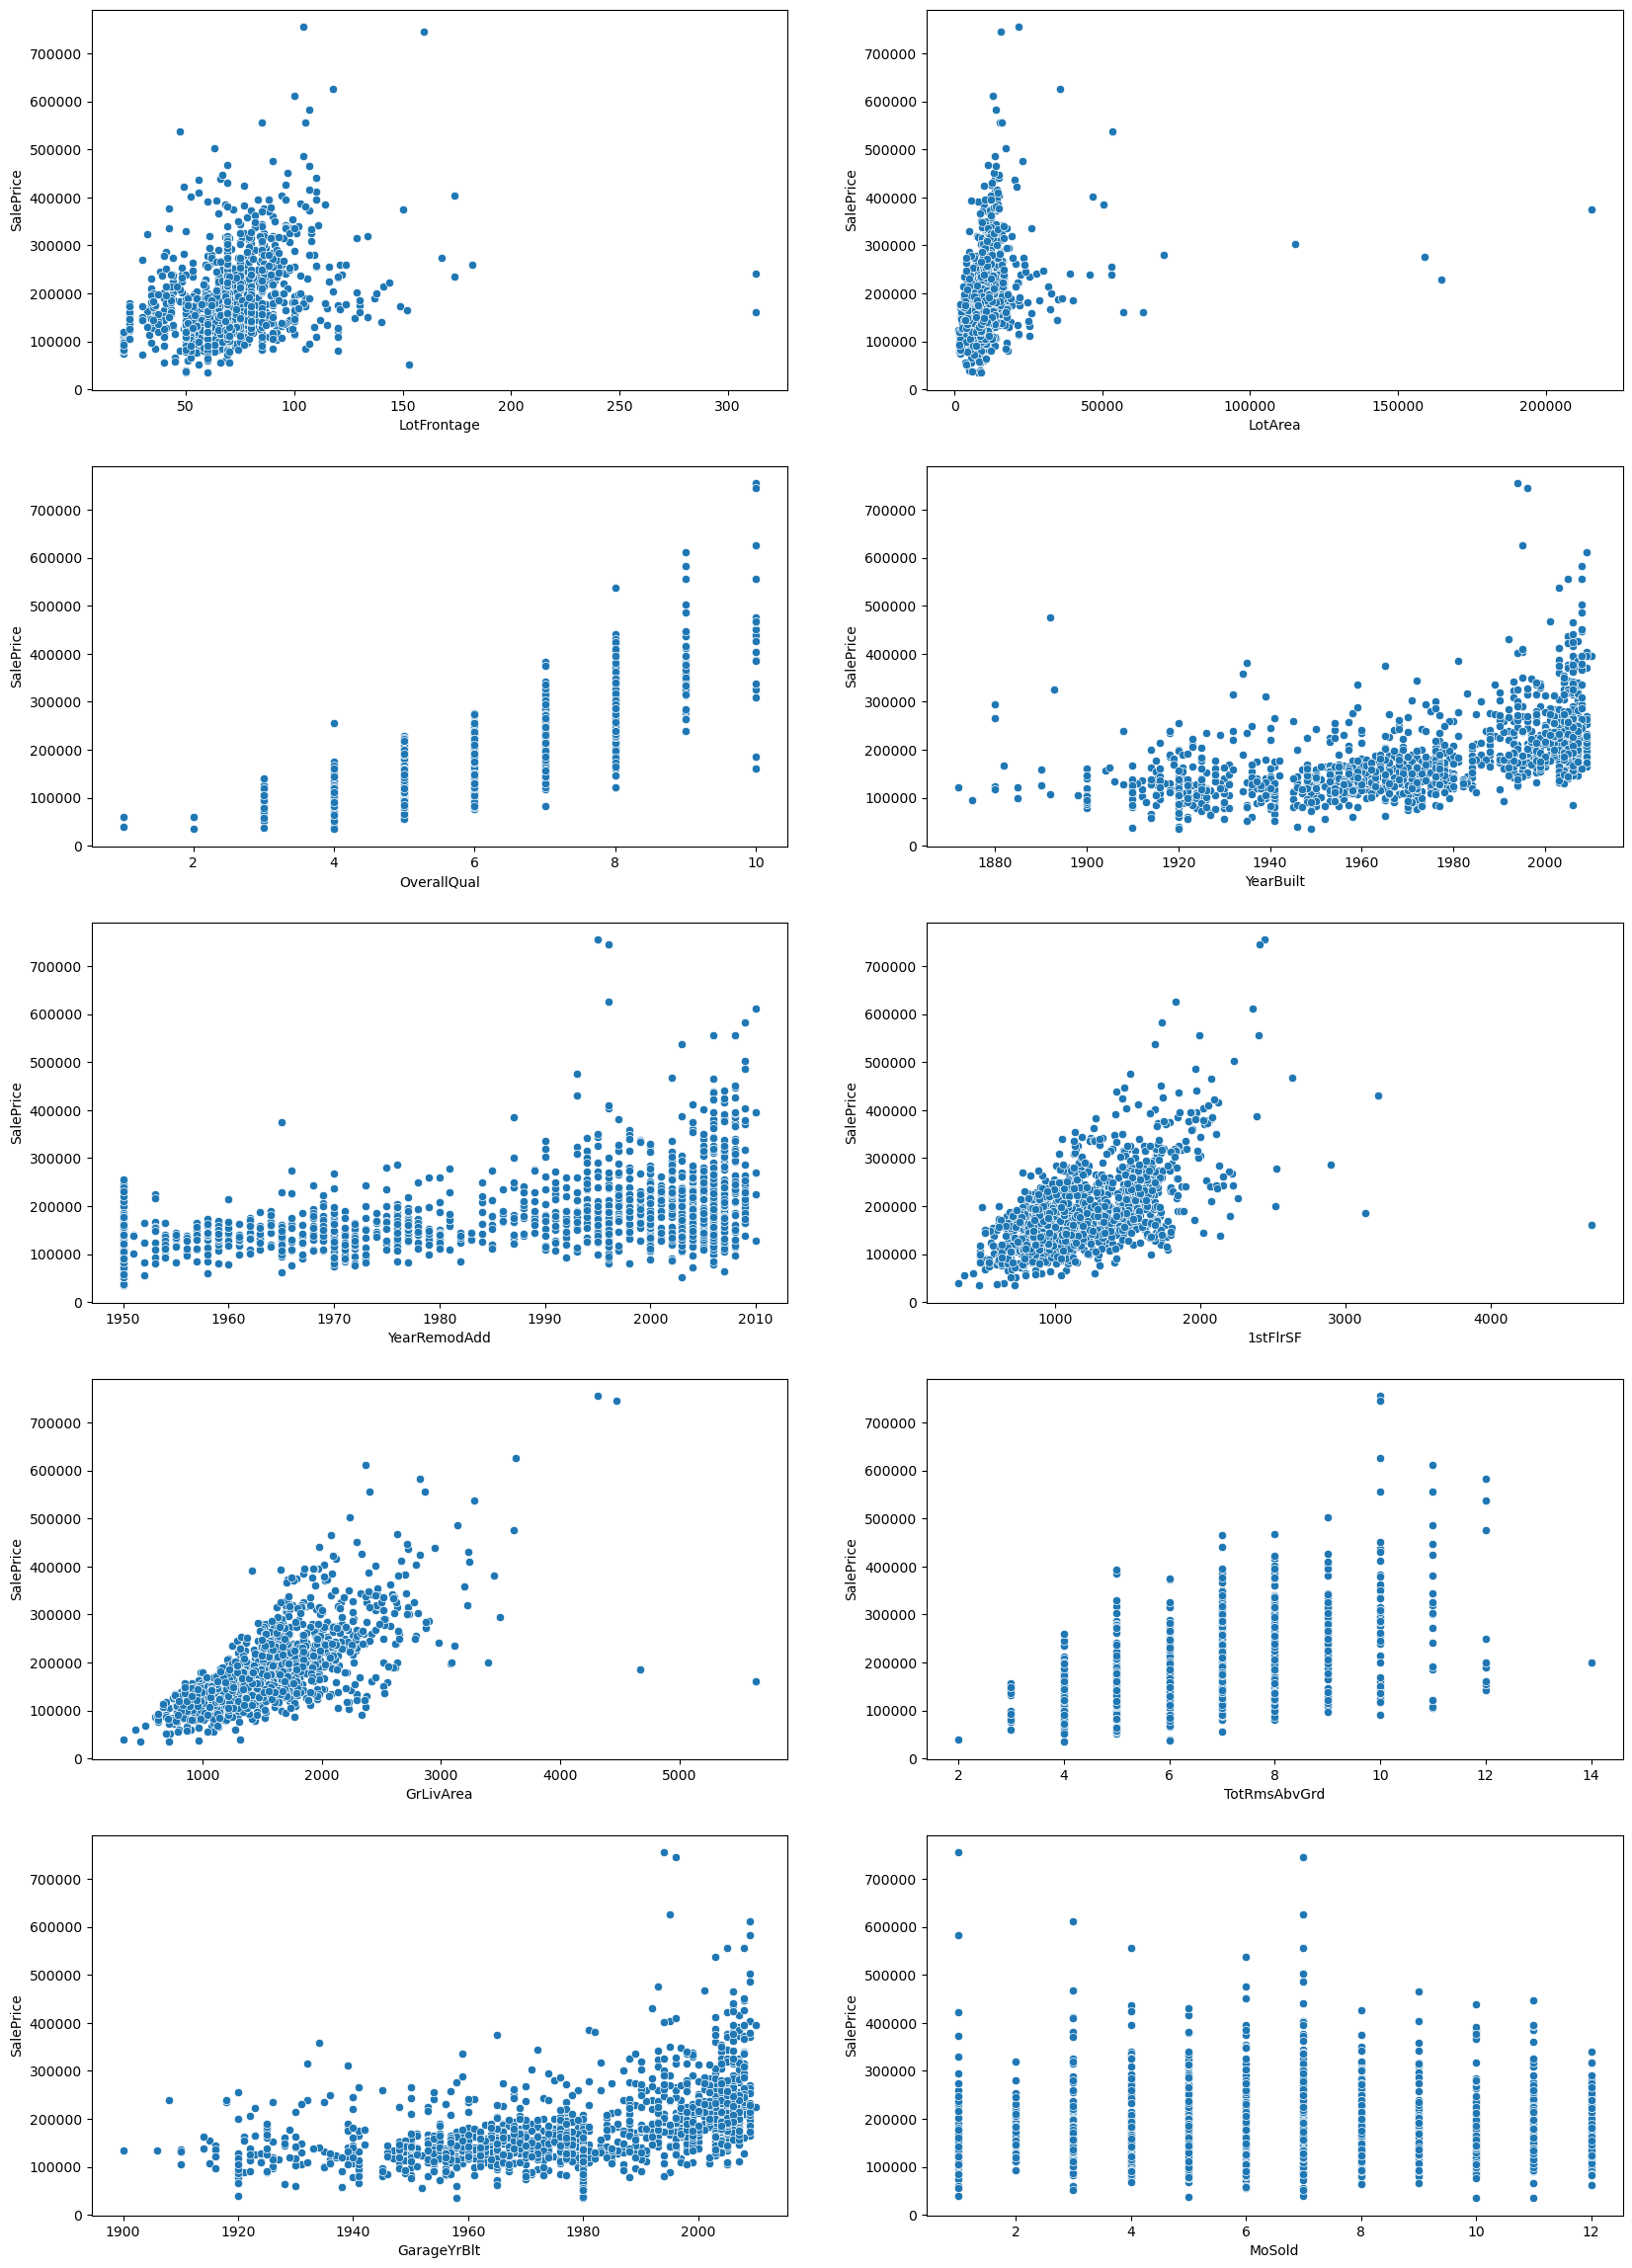

In [202]:
#Plotting the graphs with respect to 'SalePrice' to visulize the correlation. 

figure=plt.figure(figsize=(20,35))
plt.subplot(6,2,1)

sns.scatterplot(x=x1['LotFrontage'],y=y1['SalePrice'])    
                                                            
plt.subplot(6,2,2)
sns.scatterplot(x=x1['LotArea'],y=y1['SalePrice'])

plt.subplot(6,2,3)
sns.scatterplot(x=x1['OverallQual'],y=y1['SalePrice'])

plt.subplot(6,2,4)
sns.scatterplot(x=x1['YearBuilt'],y=y1['SalePrice'])

plt.subplot(6,2,5)
sns.scatterplot(x=x1['YearRemodAdd'],y=y1['SalePrice'])

plt.subplot(6,2,6)
sns.scatterplot(x=x1['1stFlrSF'],y=y1['SalePrice'])

plt.subplot(6,2,7)
sns.scatterplot(x=x1['GrLivArea'],y=y1['SalePrice'])

plt.subplot(6,2,8)
sns.scatterplot(x=x1['TotRmsAbvGrd'],y=y1['SalePrice'])

plt.subplot(6,2,9)
sns.scatterplot(x=x1['GarageYrBlt'],y=y1['SalePrice'])


plt.subplot(6,2,10)
sns.scatterplot(x=x1['MoSold'],y=y1['SalePrice'])




<Axes: >

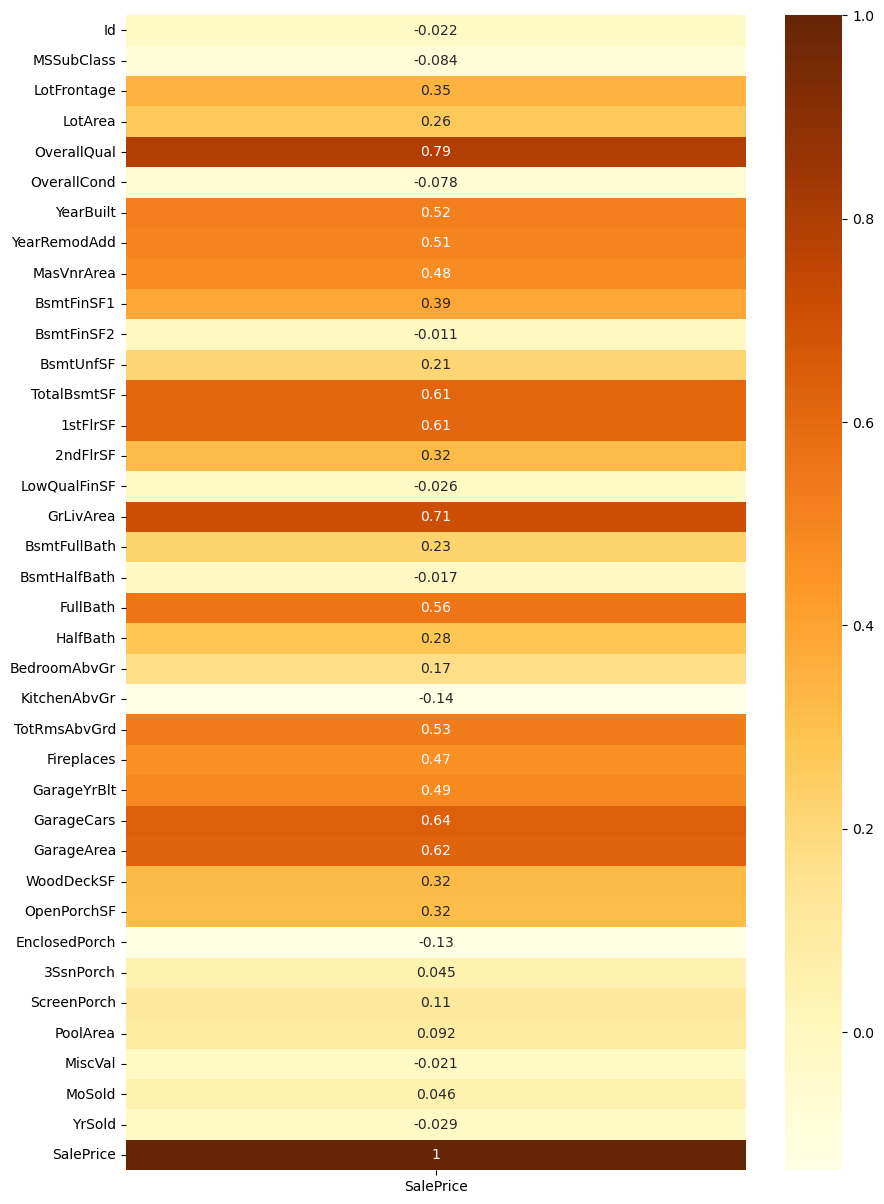

In [203]:
figure=plt.figure(figsize=(10,15))
sns.heatmap(df.corr()[['SalePrice']],annot=True,cmap='YlOrBr')

<Axes: xlabel='GarageArea', ylabel='SalePrice'>

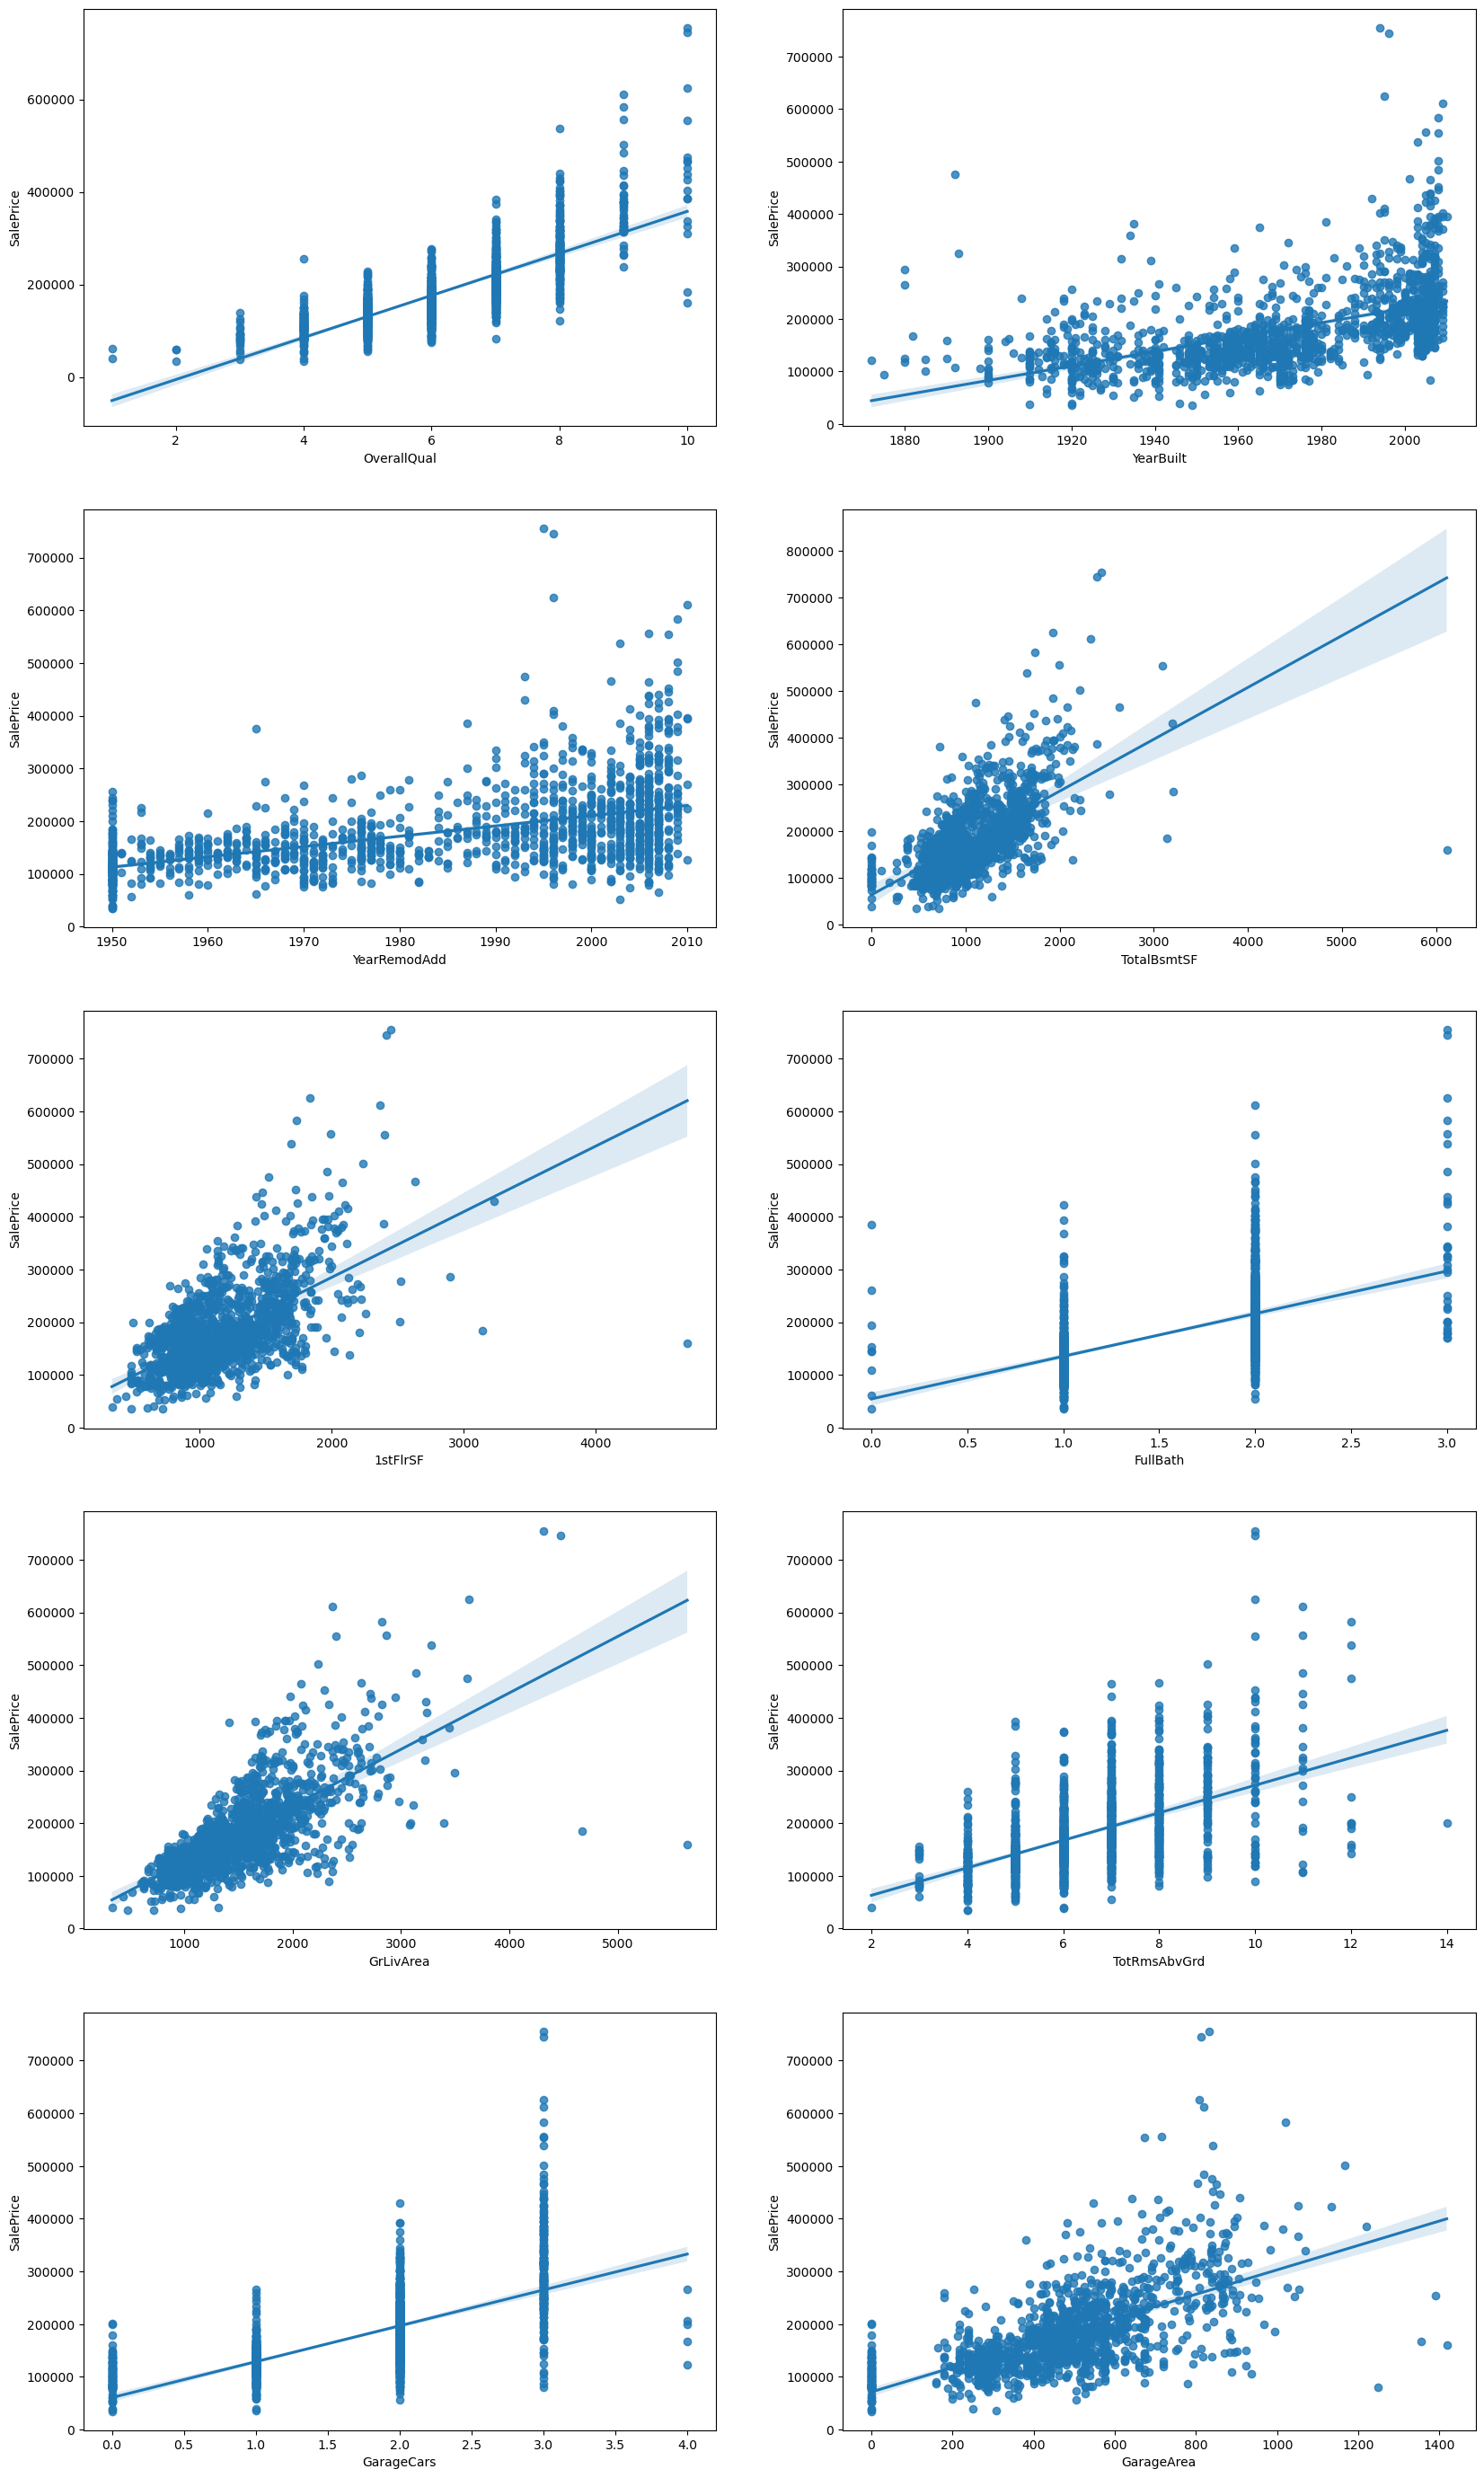

In [204]:
figure=plt.figure(figsize=(20,35))                                          #Correlation>0.5 have taken for regression ploting. 
plt.subplot(5,2,1)

sns.regplot(x=x1['OverallQual'],y=y1['SalePrice'])

plt.subplot(5,2,2)
sns.regplot(x=x1['YearBuilt'],y=y1['SalePrice'])

plt.subplot(5,2,3)
sns.regplot(x=x1['YearRemodAdd'],y=y1['SalePrice'])

plt.subplot(5,2,4)
sns.regplot(x=x1['TotalBsmtSF'],y=y1['SalePrice'])

plt.subplot(5,2,5)
sns.regplot(x=x1['1stFlrSF'],y=y1['SalePrice'])

plt.subplot(5,2,6)
sns.regplot(x=x1['FullBath'],y=y1['SalePrice'])

plt.subplot(5,2,7)
sns.regplot(x=x1['GrLivArea'],y=y1['SalePrice'])

plt.subplot(5,2,8)
sns.regplot(x=x1['TotRmsAbvGrd'],y=y1['SalePrice'])

plt.subplot(5,2,9)
sns.regplot(x=x1['GarageCars'],y=y1['SalePrice'])


plt.subplot(5,2,10)
sns.regplot(x=x1['GarageArea'],y=y1['SalePrice'])


# Encoding 

In [205]:
le=LabelEncoder()                                            #Encoding to previous dataframe and then again define x and y.

In [206]:
cat1=cat.apply(le.fit_transform)                                        #Label encoder for cat columns.
cat1

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,3,1,0,3,3,0,4,0,5,2,...,1,1,4,4,2,2,2,2,8,4
1,3,1,0,3,3,0,2,0,24,1,...,1,1,4,4,2,2,2,2,8,4
2,3,1,0,0,3,0,4,0,5,2,...,1,1,4,4,2,2,2,2,8,4
3,3,1,0,0,3,0,0,0,6,2,...,5,2,4,4,2,2,2,2,8,0
4,3,1,0,0,3,0,2,0,15,2,...,1,1,4,4,2,2,2,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,1,0,3,3,0,4,0,8,2,...,1,1,4,4,2,2,2,2,8,4
1456,3,1,0,3,3,0,4,0,14,2,...,1,2,4,4,2,2,2,2,8,4
1457,3,1,0,3,3,0,4,0,6,2,...,1,1,4,4,2,2,0,2,8,4
1458,3,1,0,3,3,0,4,0,12,2,...,1,2,4,4,2,2,2,2,8,4


In [207]:
ss=StandardScaler()                                                      #StandardScalar for con columns.

In [208]:
con1=pd.DataFrame(ss.fit_transform(con),columns=ss.get_feature_names_out())
con1

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,-1.730865,0.073375,-0.220875,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,...,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,0.347273
1,-1.728492,-0.872563,0.460320,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,...,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,0.007288
2,-1.726120,0.073375,-0.084636,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.092907,...,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,0.536154
3,-1.723747,0.309859,-0.447940,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.499274,...,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,-0.515281
4,-1.721374,0.073375,0.641972,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,0.463568,...,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777,0.869843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.721374,0.073375,-0.357114,-0.260560,-0.071836,-0.517200,0.918511,0.733308,-0.570750,-0.973018,...,-0.752176,-0.100558,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.620891,-0.614439,-0.074560
1456,1.723747,-0.872563,0.687385,0.266407,-0.071836,0.381743,0.222975,0.151865,0.087911,0.759659,...,2.033231,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,1.645210,0.366161
1457,1.726120,0.309859,-0.175462,-0.147810,0.651479,3.078570,-1.002492,1.024029,-0.570750,-0.369871,...,-0.752176,0.201405,-0.359325,-0.116339,-0.270208,-0.068692,4.953112,-0.489110,1.645210,1.077611
1458,1.728492,-0.872563,-0.084636,-0.080160,-0.795151,0.381743,-0.704406,0.539493,-0.570750,-0.865548,...,2.168910,-0.704483,1.473789,-0.116339,-0.270208,-0.068692,-0.087688,-0.859110,1.645210,-0.488523


In [209]:
df=con1.join(cat1)                                                               #Joining columns after encoding.
df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,-1.730865,0.073375,-0.220875,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,...,1,1,4,4,2,2,2,2,8,4
1,-1.728492,-0.872563,0.460320,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,...,1,1,4,4,2,2,2,2,8,4
2,-1.726120,0.073375,-0.084636,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.092907,...,1,1,4,4,2,2,2,2,8,4
3,-1.723747,0.309859,-0.447940,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.499274,...,5,2,4,4,2,2,2,2,8,0
4,-1.721374,0.073375,0.641972,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,0.463568,...,1,1,4,4,2,2,2,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1.721374,0.073375,-0.357114,-0.260560,-0.071836,-0.517200,0.918511,0.733308,-0.570750,-0.973018,...,1,1,4,4,2,2,2,2,8,4
1456,1.723747,-0.872563,0.687385,0.266407,-0.071836,0.381743,0.222975,0.151865,0.087911,0.759659,...,1,2,4,4,2,2,2,2,8,4
1457,1.726120,0.309859,-0.175462,-0.147810,0.651479,3.078570,-1.002492,1.024029,-0.570750,-0.369871,...,1,1,4,4,2,2,0,2,8,4
1458,1.728492,-0.872563,-0.084636,-0.080160,-0.795151,0.381743,-0.704406,0.539493,-0.570750,-0.865548,...,1,2,4,4,2,2,2,2,8,4


In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   float64
 1   MSSubClass     1460 non-null   float64
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   float64
 4   OverallQual    1460 non-null   float64
 5   OverallCond    1460 non-null   float64
 6   YearBuilt      1460 non-null   float64
 7   YearRemodAdd   1460 non-null   float64
 8   MasVnrArea     1460 non-null   float64
 9   BsmtFinSF1     1460 non-null   float64
 10  BsmtFinSF2     1460 non-null   float64
 11  BsmtUnfSF      1460 non-null   float64
 12  TotalBsmtSF    1460 non-null   float64
 13  1stFlrSF       1460 non-null   float64
 14  2ndFlrSF       1460 non-null   float64
 15  LowQualFinSF   1460 non-null   float64
 16  GrLivArea      1460 non-null   float64
 17  BsmtFullBath   1460 non-null   float64
 18  BsmtHalf

Model Building

# Data Subsetting

In [211]:
#Taking columns subset to define as x which are having strong correlation with the saleprice.


x=df[['OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','GarageCars','GarageArea']]


y=df1['SalePrice']



In [212]:
x

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea
0,0.651479,1.050994,0.878668,-0.459303,-0.793434,0.370333,0.789741,0.912210,0.311725,0.351000
1,-0.071836,0.156734,-0.429577,0.466465,0.257140,-0.482512,0.789741,-0.318683,0.311725,-0.060731
2,0.651479,0.984752,0.830215,-0.313369,-0.627826,0.515013,0.789741,-0.318683,0.311725,0.631726
3,0.651479,-1.863632,-0.720298,-0.687324,-0.521734,0.383659,-1.026041,0.296763,1.650307,0.790804
4,1.374795,0.951632,0.733308,0.199680,-0.045611,1.299326,0.789741,1.527656,1.650307,1.698485
...,...,...,...,...,...,...,...,...,...,...
1455,-0.071836,0.918511,0.733308,-0.238122,-0.542435,0.250402,0.789741,0.296763,0.311725,-0.060731
1456,-0.071836,0.222975,0.151865,1.104925,2.355701,1.061367,0.789741,0.296763,0.311725,0.126420
1457,0.651479,-1.002492,1.024029,0.215641,0.065656,1.569647,0.789741,1.527656,-1.026858,-1.033914
1458,-0.795151,-0.704406,0.539493,0.046905,-0.218982,-0.832788,-1.026041,-0.934130,-1.026858,-1.090059


In [213]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

# Train_test_Split

In [214]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=23)

# Model Building

# Ridge Regression

In [215]:
ra= Ridge()

In [216]:
ra.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.0001}

In [217]:
ra=Ridge(alpha=1.0)

In [218]:
ra.fit(x_train,y_train)

Ridge()

# Evaluate the model

# Training Data Evaluation

In [219]:
y_pred_train=ra.predict(x_train)

mse=mean_squared_error(y_pred_train,y_train)
print('MSE:',mse)


rmse=mse**0.5
print('RMSE:',rmse)



mae=mean_absolute_error(y_pred_train,y_train)
print('MAE:',mae)


r2=r2_score(y_pred_train,y_train)
print('R:',r2)

MSE: 1565819066.300318
RMSE: 39570.43171738613
MAE: 24698.965054001666
R: 0.689739390867747


# Testing Data Evaluation

In [220]:
y_pred=ra.predict(x_test)


mse1=mean_squared_error(y_pred,y_test)
print('MSE:',mse1)


rmse1=mse1**0.5
print('RMSE:',rmse1)



mae1=mean_absolute_error(y_pred,y_test)
print('MAE:',mae1)


r21=r2_score(y_pred,y_test)
print('R:',r21)



MSE: 898947393.1361347
RMSE: 29982.451419724417
MAE: 22467.32974014369
R: 0.7971503974475275


# Unseen Data Evaluation

In [221]:
df3=pd.read_csv("D:/Dataset/testing_set.csv")                                      #Data Gathering/Fetching.
df3

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [222]:
cat2=df3.select_dtypes(include='object')                                 #Separating cat and con columns.
con2=df3.select_dtypes(exclude='object')                            

In [223]:
cat2

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,Gar2,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,WD,Normal
1455,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,CarPort,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,NaN,NaN,NaN,NaN,Y,NaN,MnPrv,Shed,WD,Normal


In [224]:
cat2.isna().sum()                                                    #Checking for missing values.

MSZoning            4
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinType2       42
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
KitchenQual         1
Functional          2
FireplaceQu       730
GarageType         76
GarageFinish       78
GarageQual         78
GarageCond         78
PavedDrive          0
PoolQC           1456
Fence            1169
MiscFeature      1408
SaleType            1
SaleCondition       0
dtype: int64

In [225]:
for i in cat2:                                                                  #Filling missing values in cat columns.
    if cat2[i].dtypes=='object':
        cat2[i]=cat2[i].fillna(cat2[i].mode()[0])
    else:
        cat2[i]=cat2[i].fillna(cat2[i].median()[0])

In [226]:
cat2.isna().sum()                                                                   #Rechecking for the missing values.

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

In [227]:
con2

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,506.0,0,82,0,0,144,0,0,1,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,...,0.0,0,0,0,0,0,0,0,6,2006
1455,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,...,286.0,0,24,0,0,0,0,0,4,2006
1456,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,...,576.0,474,0,0,0,0,0,0,9,2006
1457,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,...,0.0,80,32,0,0,0,0,700,7,2006


In [228]:
con2.isna().sum()                                                                #Checking missing values in con columns.

Id                 0
MSSubClass         0
LotFrontage      227
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        15
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       78
GarageCars         1
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [229]:
for i in con2:                                                                        #Filling missing values in con columns.
    if con2[i].dtypes=='object':
        con2[i]=con2[i].fillna(con2[i].mode()[0])
    else:
        con2[i]=con2[i].fillna(con2[i].median())

In [230]:
con2.isna().sum()                                                                #Rechecking for missing values in con columns.

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64

In [231]:
df4=con2.join(cat2)                                                                     #Joining cat and con columns.
df4

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Gar2,WD,Normal
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,Attchd,Fin,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,Attchd,Fin,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,Attchd,RFn,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,...,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
1455,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,...,CarPort,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Abnorml
1456,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,...,Detchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Abnorml
1457,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,...,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal


In [232]:
#Defining x and y.


x2=df3.drop(['Id','MSSubClass','OverallCond','BsmtFinSF2','LowQualFinSF','BsmtHalfBath','KitchenAbvGr','EnclosedPorch','MiscVal','YrSold'],axis=1)     

#Can create multicollinearity.
#Shows Low Correlation.
#Encoders require their input to be uniformly strings or numbers.

y1=df1[['SalePrice']]   




In [233]:
x2

,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MoSold,SaleType,SaleCondition
0,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,120,0,NaN,MnPrv,NaN,6,WD,Normal
1,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,NaN,NaN,Gar2,6,WD,Normal
2,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,NaN,MnPrv,NaN,3,WD,Normal
3,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,NaN,NaN,NaN,6,WD,Normal
4,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,...,82,0,144,0,NaN,NaN,NaN,1,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,NaN,NaN,NaN,6,WD,Normal
1455,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,24,0,0,0,NaN,NaN,NaN,4,WD,Abnorml
1456,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,NaN,NaN,NaN,9,WD,Abnorml
1457,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,32,0,0,0,NaN,MnPrv,Shed,7,WD,Normal


In [234]:
y1

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [235]:
le=LabelEncoder()
test_cat=cat2.apply(le.fit_transform)                                              #Applying encoding on cat columns.
test_cat

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,2,1,0,3,3,0,4,0,12,1,...,1,2,3,4,2,0,2,2,8,4
1,3,1,0,0,3,0,0,0,12,2,...,1,2,3,4,2,0,2,0,8,4
2,3,1,0,0,3,0,4,0,8,2,...,1,0,3,4,2,0,2,2,8,4
3,3,1,0,0,3,0,4,0,8,2,...,1,0,3,4,2,0,2,2,8,4
4,3,1,0,0,1,0,4,0,22,2,...,1,1,3,4,2,0,2,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,4,1,0,3,3,0,4,0,10,2,...,1,2,3,4,2,0,2,2,8,4
1455,4,1,0,3,3,0,4,0,10,2,...,4,2,3,4,2,0,2,2,8,0
1456,3,1,0,3,3,0,4,0,11,2,...,5,2,3,4,2,0,2,2,8,0
1457,3,1,0,3,3,0,4,0,11,2,...,1,2,3,4,2,0,2,2,8,4


In [236]:
#Applying encoding on con columns.

test_con=pd.DataFrame(ss.fit_transform(con2),columns=ss.get_feature_names_out())
test_con


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,-1.730864,-0.874711,0.567330,0.363929,-0.751101,0.400766,-0.340945,-1.072885,-0.563316,0.063428,...,1.185921,0.366678,-0.701628,-0.360738,-0.088827,1.818960,-0.057227,-0.092244,-0.038281,1.713905
1,-1.728490,-0.874711,0.615963,0.897861,-0.054877,0.400766,-0.439695,-1.214908,0.047057,1.063511,...,-0.741235,2.347867,-0.178826,-0.360738,-0.088827,-0.301543,-0.057227,19.730438,-0.038281,1.713905
2,-1.726115,0.061351,0.275532,0.809646,-0.751101,-0.497418,0.844059,0.678742,-0.563316,0.773377,...,0.042537,0.930495,-0.207871,-0.360738,-0.088827,-0.301543,-0.057227,-0.092244,-1.140614,1.713905
3,-1.723741,0.061351,0.470064,0.032064,-0.054877,0.400766,0.876976,0.678742,-0.450284,0.357958,...,-0.012788,2.089451,-0.178826,-0.360738,-0.088827,-0.301543,-0.057227,-0.092244,-0.038281,1.713905
4,-1.721367,1.465443,-1.232092,-0.971808,1.337571,-0.497418,0.679475,0.394694,-0.563316,-0.387160,...,0.153187,-0.729632,0.489198,-0.360738,-0.088827,2.243060,-0.057227,-0.092244,-1.875504,1.713905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1.721367,2.401505,-2.302019,-1.591330,-1.447325,1.298950,-0.044694,-0.646813,-0.563316,-0.965230,...,-2.179687,-0.729632,-0.701628,-0.360738,-0.088827,-0.301543,-0.057227,-0.092244,-0.038281,-1.359958
1455,1.723741,2.401505,-2.302019,-1.599808,-1.447325,-0.497418,-0.044694,-0.646813,-0.563316,-0.411338,...,-0.861106,-0.729632,-0.353093,-0.360738,-0.088827,-0.301543,-0.057227,-0.092244,-0.773170,-1.359958
1456,1.726115,-0.874711,4.457971,2.055150,-0.751101,1.298950,-0.373861,0.584059,-0.563316,1.725105,...,0.475916,2.982161,-0.701628,-0.360738,-0.088827,-0.301543,-0.057227,-0.092244,1.064053,-1.359958
1457,1.728490,0.646389,-0.308065,0.125527,-0.751101,-0.497418,0.679475,0.394694,-0.563316,-0.224509,...,-2.179687,-0.103169,-0.236915,-0.360738,-0.088827,-0.301543,-0.057227,1.017827,0.329164,-1.359958


In [237]:
df5=test_con.join(test_cat)                                                         #Joining the columns after encoding.
df5

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,-1.730864,-0.874711,0.567330,0.363929,-0.751101,0.400766,-0.340945,-1.072885,-0.563316,0.063428,...,1,2,3,4,2,0,2,2,8,4
1,-1.728490,-0.874711,0.615963,0.897861,-0.054877,0.400766,-0.439695,-1.214908,0.047057,1.063511,...,1,2,3,4,2,0,2,0,8,4
2,-1.726115,0.061351,0.275532,0.809646,-0.751101,-0.497418,0.844059,0.678742,-0.563316,0.773377,...,1,0,3,4,2,0,2,2,8,4
3,-1.723741,0.061351,0.470064,0.032064,-0.054877,0.400766,0.876976,0.678742,-0.450284,0.357958,...,1,0,3,4,2,0,2,2,8,4
4,-1.721367,1.465443,-1.232092,-0.971808,1.337571,-0.497418,0.679475,0.394694,-0.563316,-0.387160,...,1,1,3,4,2,0,2,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1.721367,2.401505,-2.302019,-1.591330,-1.447325,1.298950,-0.044694,-0.646813,-0.563316,-0.965230,...,1,2,3,4,2,0,2,2,8,4
1455,1.723741,2.401505,-2.302019,-1.599808,-1.447325,-0.497418,-0.044694,-0.646813,-0.563316,-0.411338,...,4,2,3,4,2,0,2,2,8,0
1456,1.726115,-0.874711,4.457971,2.055150,-0.751101,1.298950,-0.373861,0.584059,-0.563316,1.725105,...,5,2,3,4,2,0,2,2,8,0
1457,1.728490,0.646389,-0.308065,0.125527,-0.751101,-0.497418,0.679475,0.394694,-0.563316,-0.224509,...,1,2,3,4,2,0,2,2,8,4


In [238]:
#Subsetting the data.

x3=df5[['OverallQual','YearBuilt','YearRemodAdd','TotalBsmtSF','1stFlrSF','GrLivArea','FullBath','TotRmsAbvGrd','GarageCars','GarageArea']]

y=df1['SalePrice']

In [239]:
x3

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea
0,-0.751101,-0.340945,-1.072885,-0.370716,-0.654561,-1.215588,-1.028720,-0.918335,-0.988189,1.185921
1,-0.054877,-0.439695,-1.214908,0.639230,0.433298,-0.323539,-1.028720,-0.255371,-0.988189,-0.741235
2,-0.751101,0.844059,0.678742,-0.266784,-0.574165,0.294508,0.773083,-0.255371,0.301406,0.042537
3,-0.054877,0.876976,0.678742,-0.271303,-0.579190,0.243004,0.773083,0.407593,0.301406,-0.012788
4,1.337571,0.679475,0.394694,0.528520,0.310192,-0.424487,0.773083,-0.918335,0.301406,0.153187
...,...,...,...,...,...,...,...,...,...,...
1454,-1.447325,-0.044694,-0.646813,-1.129871,-1.533893,-0.811797,-1.028720,-0.918335,-2.277784,-2.179687
1455,-1.447325,-0.044694,-0.646813,-1.129871,-1.533893,-0.811797,-1.028720,-0.255371,-0.988189,-0.861106
1456,-0.751101,-0.373861,0.584059,0.401995,0.169499,-0.539856,-1.028720,0.407593,0.301406,0.475916
1457,-0.751101,0.679475,0.394694,-0.302935,-0.468645,-1.063136,-1.028720,-0.255371,-2.277784,-2.179687


In [240]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [241]:
y_pred=ra.predict(x3)    
y_pred

array([108761.89310321, 162158.59409525, 170895.64484931, ...,
       156668.90814397, 113526.76532843, 247591.35012977])

In [242]:
Price_Prediction = pd.DataFrame({'Id': df3.Id,'SalePrice': y_pred})

In [243]:
Price_Prediction

,Id,SalePrice
0,1461,108761.893103
1,1462,162158.594095
2,1463,170895.644849
3,1464,191421.447104
4,1465,222227.499849
...,...,...
1454,2915,74933.503890
1455,2916,89806.063118
1456,2917,156668.908144
1457,2918,113526.765328


In [245]:
Price_Prediction.to_csv('Price_Prediction.csv',index=False)